In [1]:
from keras.datasets import fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
print('Training data shape : ', train_x.shape, train_y.shape)

print('Testing data shape : ', test_x.shape, test_y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [3]:
import numpy as np
print("classes: " ,np.unique(train_y))
print("no. of classes:", len(np.unique(test_y)))

classes:  [0 1 2 3 4 5 6 7 8 9]
no. of classes: 10


Text(0.5, 1.0, '9')

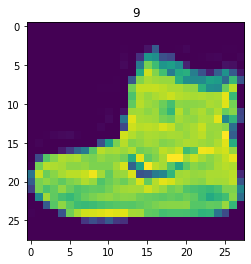

In [4]:
import matplotlib.pyplot as plt
plt.imshow(train_x[0])
plt.title(train_y[0])

Text(0.5, 1.0, '2')

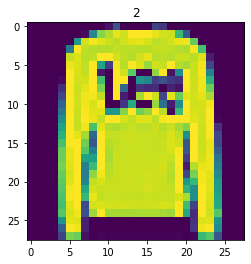

In [5]:
plt.imshow(test_x[1])
plt.title(test_y[1])

In [6]:
train_x=train_x.reshape(-1,28,28,1)
test_x=test_x.reshape(-1,28,28,1)
train_x.shape, test_x.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
train_x[0].dtype

dtype('uint8')

In [8]:
train_x=train_x.astype('float32')
test_x=test_x.astype('float32')

In [9]:
train_x=train_x/255.
test_x=test_x/255.

In [10]:
from tensorflow.keras.utils import to_categorical
train_y_1hot=to_categorical(train_y)
test_y_1hot=to_categorical(test_y)

In [11]:
train_y_1hot.shape

(60000, 10)

In [12]:
train_y.shape

(60000,)

In [13]:
from sklearn.model_selection import train_test_split
train_x,valid_x,train_label,valid_label=train_test_split(train_x,train_y_1hot,test_size=0.2,random_state=13)

In [14]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [15]:
batch_size = 64
epochs = 20
num_classes = 10

In [20]:
fashion_model=Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3,3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2), padding='same'))
fashion_model.add(Conv2D(64, kernel_size=(3,3),activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2), padding='same'))
fashion_model.add(Conv2D(128, kernel_size=(3,3),activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2), padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [21]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'], optimizer=keras.optimizers.Adam())

In [22]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

In [23]:
fashion_train=fashion_model.fit(train_x,train_label,batch_size=batch_size,epochs=epochs,validation_data=(valid_x,valid_label),verbose=1)

Epoch 1/20
750/750 [==============================] - 106s 121ms/step - loss: 0.6782 - accuracy: 0.7509 - val_loss: 0.3370 - val_accuracy: 0.8769
Epoch 2/20
750/750 [==============================] - 89s 119ms/step - loss: 0.2972 - accuracy: 0.8907 - val_loss: 0.2974 - val_accuracy: 0.8933
Epoch 3/20
750/750 [==============================] - 90s 119ms/step - loss: 0.2430 - accuracy: 0.9109 - val_loss: 0.2541 - val_accuracy: 0.9068
Epoch 4/20
750/750 [==============================] - 90s 120ms/step - loss: 0.2017 - accuracy: 0.9260 - val_loss: 0.2513 - val_accuracy: 0.9070
Epoch 5/20
750/750 [==============================] - 89s 119ms/step - loss: 0.1808 - accuracy: 0.9347 - val_loss: 0.2245 - val_accuracy: 0.9201
Epoch 6/20
750/750 [==============================] - 89s 119ms/step - loss: 0.1594 - accuracy: 0.9409 - val_loss: 0.2260 - val_accuracy: 0.9224
Epoch 7/20
750/750 [==============================] - 89s 119ms/step - loss: 0.1364 - accuracy: 0.9489 - val_loss: 0.2315 - val_a

In [24]:
test_eval=fashion_model.evaluate(test_x, test_y_1hot,verbose=1)

313/313 [==============================] - 6s 19ms/step - loss: 0.5218 - accuracy: 0.9167


In [25]:
predicted_classes=fashion_model.predict(test_x)


In [28]:
print(predicted_classes)

[9 2 1 ... 8 1 5]


In [27]:
predicted_classes=np.argmax(np.round(predicted_classes),axis=1)

AttributeError: ignored

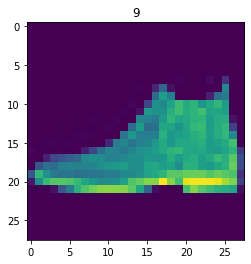

In [34]:
correct=np.where(predicted_classes==test_y)[0]
plt.imshow(test_x[correct][0].reshape(28,28))
plt.title(predicted_classes[correct][0],test_y[correct][0])